In [1]:
import numpy as np
from PIL import Image

In [2]:
def median_filter(image, kernel_size):
    width, height = image.size
    half_kernel = kernel_size // 2
    image = np.array(image)

    result = np.zeros((height, width), dtype=np.uint8)

    for y in range(half_kernel, height - half_kernel):
        for x in range(half_kernel, width - half_kernel):
            window = image[y - half_kernel:y + half_kernel + 1, x - half_kernel:x + half_kernel + 1]
            window = sorted((window.reshape((1,-1)))[0])
            median_value = np.median(window)
            result[y, x] = int(median_value)

    return Image.fromarray(result)

In [3]:
input_image = Image.open("saturn3.gif")

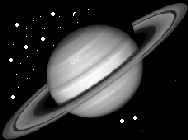

In [4]:
input_image

In [5]:
kernel_size = 3
output_image = median_filter(input_image, kernel_size)

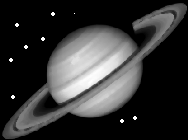

In [6]:
output_image


In [7]:
output_image.save("output.gif")

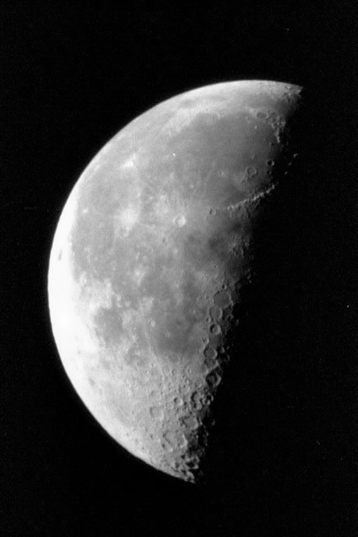

In [81]:
img = np.array(Image.open("moon.tif"))
img  =Image.fromarray((img))
img.convert('RGB')


In [82]:
input_image2 = np.array(img)/255
input_image2

array([[0.00392157, 0.01176471, 0.02745098, ..., 0.03137255, 0.0627451 ,
        0.03137255],
       [0.01176471, 0.02745098, 0.01176471, ..., 0.01568627, 0.04313725,
        0.04705882],
       [0.02352941, 0.01568627, 0.02352941, ..., 0.02745098, 0.00784314,
        0.01176471],
       ...,
       [0.01568627, 0.03137255, 0.03137255, ..., 0.02352941, 0.01568627,
        0.03137255],
       [0.01568627, 0.03137255, 0.03137255, ..., 0.01568627, 0.02352941,
        0.02352941],
       [0.00784314, 0.01176471, 0.01176471, ..., 0.02352941, 0.03529412,
        0.03529412]])

In [83]:
import scipy as sp

In [84]:

F_u_v = sp.fftpack.fftn(input_image2)


F_u_v.shape

(537, 358)

In [117]:
M = 1
a =1
b =0.01

In [118]:
answ = np.zeros(F_u_v.shape)

answ= sp.fftpack.ifftn(M * np.log(a + b * np.abs(F_u_v)) * np.exp(1j*np.arctan2(F_u_v.imag,F_u_v.real)) )

In [119]:
from IPython.display import display

print(np.array(input_image2), np.abs(answ)  )

mx = np.max(np.abs(answ))
print(mx)

mn = np.min(np.abs(answ))
print(mn)
answ=(np.abs(answ)-mn)/(mx-mn)*255.0

[[0.00392157 0.01176471 0.02745098 ... 0.03137255 0.0627451  0.03137255]
 [0.01176471 0.02745098 0.01176471 ... 0.01568627 0.04313725 0.04705882]
 [0.02352941 0.01568627 0.02352941 ... 0.02745098 0.00784314 0.01176471]
 ...
 [0.01568627 0.03137255 0.03137255 ... 0.02352941 0.01568627 0.03137255]
 [0.01568627 0.03137255 0.03137255 ... 0.01568627 0.02352941 0.02352941]
 [0.00784314 0.01176471 0.01176471 ... 0.02352941 0.03529412 0.03529412]] [[1.82269707e-04 1.23389602e-04 1.45940310e-05 ... 8.79237699e-05
  3.84796904e-04 8.09317438e-05]
 [1.05761815e-04 3.20211516e-05 1.40724005e-04 ... 6.22711521e-05
  1.96882039e-04 2.38518406e-04]
 [8.80263696e-06 8.77680468e-05 2.80306726e-05 ... 5.06452674e-05
  1.42683811e-04 1.01703219e-04]
 ...
 [7.75655588e-05 6.77363396e-05 6.07005854e-05 ... 8.50526943e-06
  8.03981601e-05 7.71044499e-05]
 [7.34657269e-05 6.45294132e-05 5.65357056e-05 ... 7.39694191e-05
  6.20847440e-06 7.37954346e-06]
 [1.45847575e-04 1.24716744e-04 1.38342211e-04 ... 8.388

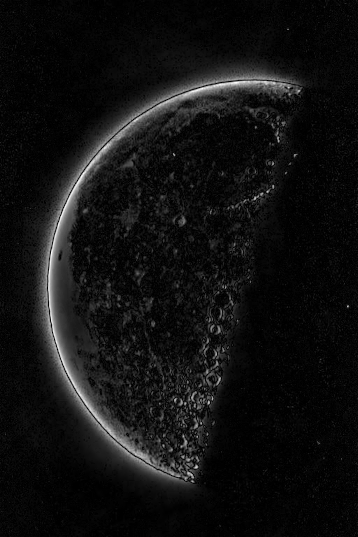

In [120]:
img  =Image.fromarray((answ))
img.convert('RGB')